In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageEnhance
import cv2
import scipy.misc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Jason would like enhanced contrast on the image

54689.0
23375.0


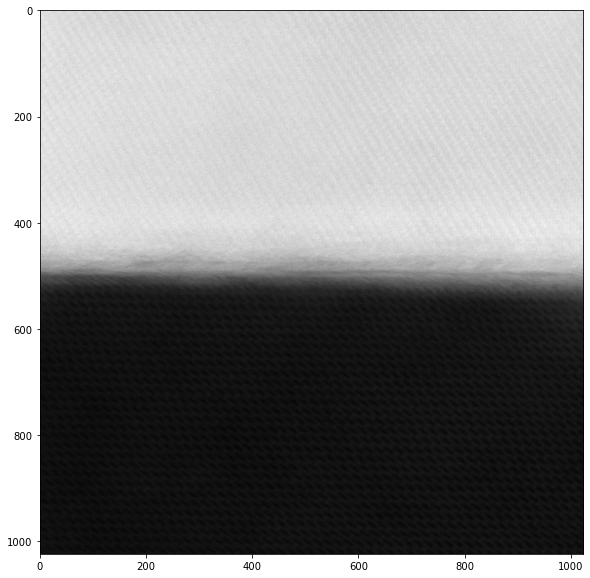

In [19]:
im = Image.open('D:/2020/RemoteEpiHeusler/100619_GdPtSb/im_9.tif')
im_array = np.asarray(im)
im_array = im_array.astype('float')
fig = plt.figure(figsize=[10,10])
plt.imshow(im,cmap='gray')
# plt.axis('off')
print(np.amax(im_array))
print(np.amin(im_array))

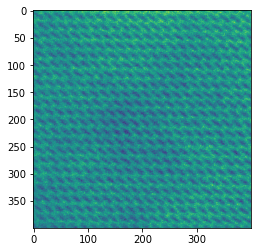

In [24]:
# Fourier transform patch
# interface 2
# temp = im_array[600:1000,200:600] # film
# temp = im_array[0:400,400:800] # substrate
# interface 1
temp = im_array[600:1000,200:600] # film
# temp = im_array[0:400,200:600] # substrate
temp_fft = np.fft.fft2(temp)
plt.imshow(temp)

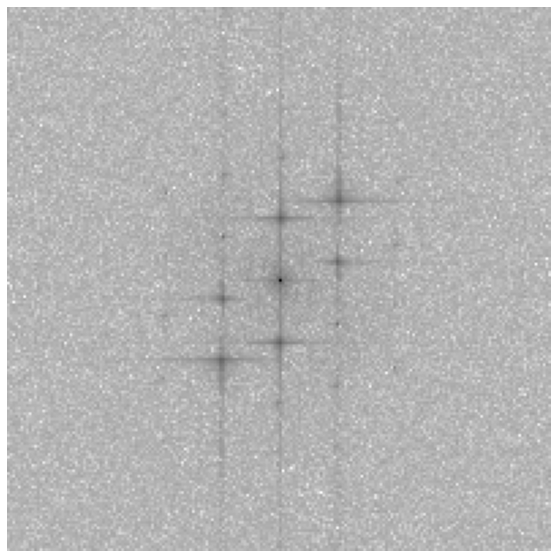

In [25]:
fig = plt.figure(figsize=[10,10])
plt.imshow(-np.log(np.fft.fftshift(np.abs(temp_fft)))[100:300,100:300],cmap='gray')
plt.axis('off')
fig.savefig('D:/2020/RemoteEpiHeusler/100619_GdPtSb/FiguresForDongxue_enhancedContrast/Interface_1_film_fft_reverse.tiff')

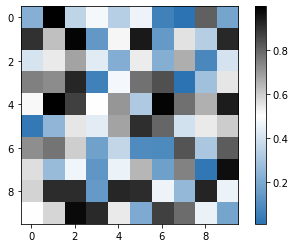

In [84]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['#2b73b2', 'white', 'black'])

fig, ax = plt.subplots()
im = ax.imshow(np.random.random((10, 10)), cmap=cmap, interpolation='nearest')
fig.colorbar(im)
plt.show()

(-0.5, 1023.5, 1023.5, -0.5)

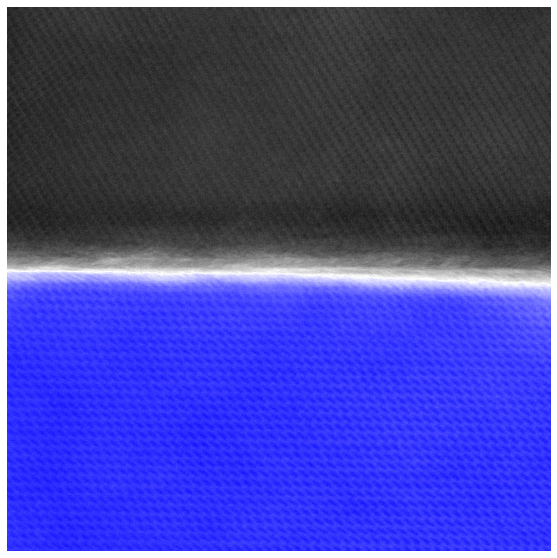

In [78]:
# Test 2: Use a differen colormap
fig = plt.figure(figsize=[10,10])
plt.imshow(np.log(im_array),cmap=cmap)
plt.axis('off')
# fig.savefig('D:/2020/RemoteEpiHeusler/100619_GdPtSb/FiguresForDongxue_enhancedContrast/Interface_1.tiff')

10.909417871295242
10.059422354156888


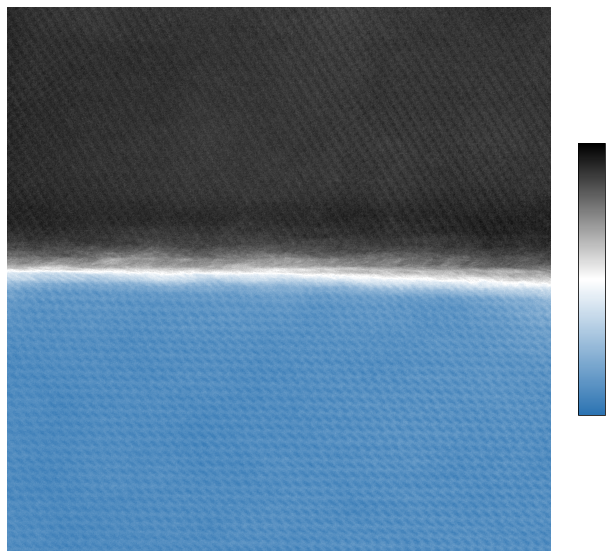

In [87]:
# Test3: use square root of intensity
fig = plt.figure(figsize=[10,10],facecolor='white')
temp = np.log(im_array)
ax = plt.gca()
im = ax.imshow(temp,cmap=cmap)
plt.axis('off')

axins1 = inset_axes(ax,
                    width="5%",  # width = 5% of parent_bbox width
                   height="50%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0.25, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

fig.colorbar(im, cax=axins1, orientation="vertical", ticks=[])
axins1.xaxis.set_ticks_position("bottom")
# fig.savefig('test.tif')

print(np.amax(temp))
print(np.amin(temp))
fig.savefig('D:/2020/RemoteEpiHeusler/100619_GdPtSb/FiguresForDongxue_enhancedContrast/Interface_1_BlackBlue.tiff')

(-0.5, 199.5, 199.5, -0.5)

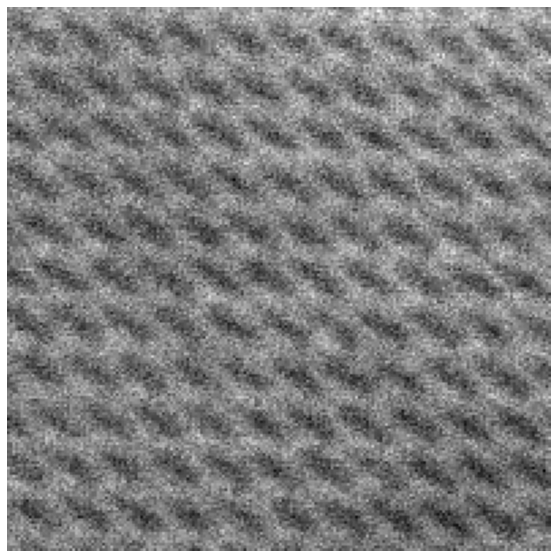

In [16]:
# Test 4: show a small patch of image with enhanced contrast
im = Image.open('D:/2020/RemoteEpiHeusler/100619_GdPtSb/im_9.tif')
im_array = np.asarray(im)
im_array = im_array.astype('float')
fig = plt.figure(figsize=[10,10])
temp = im_array[600:800,200:400]
plt.imshow(np.sqrt(temp),cmap='gray')
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

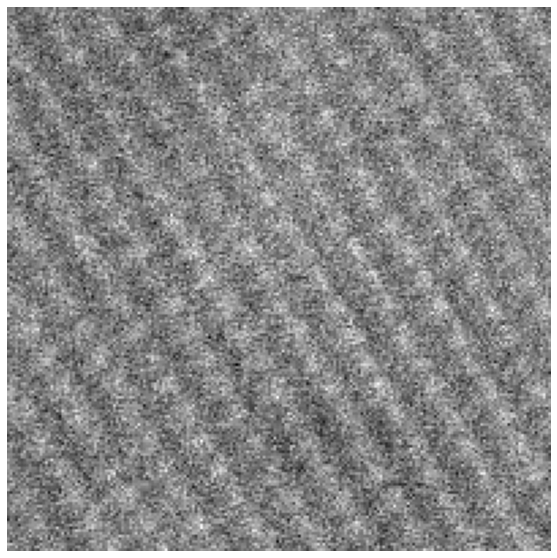

In [17]:
im = Image.open('D:/2020/RemoteEpiHeusler/100619_GdPtSb/im_9.tif')
im_array = np.asarray(im)
im_array = im_array.astype('float')
fig = plt.figure(figsize=[10,10])
temp = im_array[100:300,600:800]
plt.imshow(np.sqrt(temp),cmap='gray')
plt.axis('off')

In [18]:
# Test 5: change the gamma factor
im_array?

In [3]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

In [16]:
x = 'D:/2020/RemoteEpiHeusler/100619_GdPtSb/im_9.tif'  #location of the image
original = cv2.imread(x, 1)
# cv2.imshow('original',original)

gamma = 1.3                                  # change the value here to get different result
adjusted = adjust_gamma(original, gamma=gamma)
# cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
# cv2.imshow("gammam image 1", adjusted)

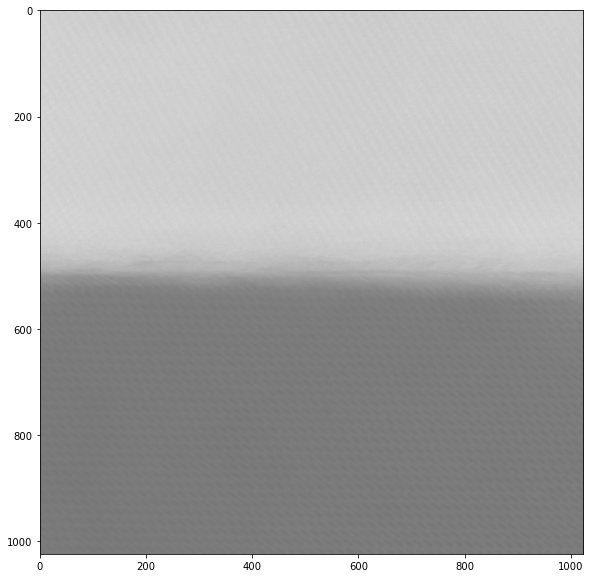

In [17]:
fig = plt.figure(figsize=[10,10])
plt.imshow(adjusted)